<a href="https://colab.research.google.com/github/vatsalcode/MIT_ASS_Intel_Extraction/blob/main/MIT_ASS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from datetime import datetime
Intel_df=pd.read_csv("Intel_CPUs.csv")
Intel_df


,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,Cache,Bus_Speed,TDP,Embedded_Options_Available,Conflict_Free,Max_Memory_Size,Memory_Types,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,ECC_Memory_Supported,Processor_Graphics_,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,Graphics_Video_Max_Memory,Graphics_Output,Support_4k,Max_Resolution_HDMI,Max_Resolution_DP,Max_Resolution_eDP_Integrated_Flat_Panel,DirectX_Support,OpenGL_Support,PCI_Express_Revision,PCI_Express_Configurations_,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,3.60 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,1.05 GHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,3.40 GHz,6 MB SmartCache,4 GT/s OPI,15 W,No,Yes,32 GB,"DDR4-2400, LPDDR3-2133",2.0,34.1 GB/s,No,NaN,300 MHz,1.10 GHz,32 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",12.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,4.00 GHz,8 MB SmartCache,4 GT/s OPI,15 W,No,Yes,32 GB,"DDR4-2400, LPDDR3-2133",2.0,34.1 GB/s,No,NaN,300 MHz,1.15 GHz,32 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",12.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,3.80 GHz,10 MB SmartCache,5 GT/s DMI2,130 W,No,NaN,64.23 GB,DDR3 1066/1333/1600,4.0,51.2 GB/s,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,40.0,66.8°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,3.30 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,950 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y54,Launched,Q3'15,14 nm,$281.00,2,4.0,1.10 GHz,2.70 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,900 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096@2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2279,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y57,Launched,Q3'15,14 nm,$281.00,2,4.0,1.10 GHz,2.80 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,900 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096@2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2280,6th Generation Intel® Core™ m Processors,Mobile,M7-6Y75,Launched,Q3'15,14 nm,$393.00,2,4.0,1.20 GHz,3.10 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,1.00 GHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096@2304@2

In [ ]:
Intel_df = Intel_df[np.invert(Intel_df["Launch_Date"].isnull())]

In [ ]:
def sortmap(x):
    firstPart = x[:2]
    if firstPart[0] == "0":
        temp = list(firstPart)
        temp[0] = "Q"
        firstPart = "".join(temp)
    try:
        restOfIt = int(x[3:])
    except ValueError:
        restOfIt = int(x[4:])
    matcher = {
        "Q1": "-02",
        "Q2": "-05",
        "Q3": "-08",
        "Q4": "-11"
    }
    date = ("20" if restOfIt < 18 else "19") + str(restOfIt).rjust(2,"0") + matcher[firstPart]
    return date

Intel_df["Launch_Date"] = Intel_df["Launch_Date"].apply(sortmap)


In [ ]:
Intel_df

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,Cache,Bus_Speed,TDP,Embedded_Options_Available,Conflict_Free,Max_Memory_Size,Memory_Types,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,ECC_Memory_Supported,Processor_Graphics_,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,Graphics_Video_Max_Memory,Graphics_Output,Support_4k,Max_Resolution_HDMI,Max_Resolution_DP,Max_Resolution_eDP_Integrated_Flat_Panel,DirectX_Support,OpenGL_Support,PCI_Express_Revision,PCI_Express_Configurations_,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,2016-08,14 nm,$393.00,2,4.0,1.30 GHz,3.60 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,1.05 GHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,2017-08,14 nm,$297.00,4,8.0,1.60 GHz,3.40 GHz,6 MB SmartCache,4 GT/s OPI,15 W,No,Yes,32 GB,"DDR4-2400, LPDDR3-2133",2.0,34.1 GB/s,No,NaN,300 MHz,1.10 GHz,32 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",12.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,2017-08,14 nm,$409.00,4,8.0,1.80 GHz,4.00 GHz,8 MB SmartCache,4 GT/s OPI,15 W,No,Yes,32 GB,"DDR4-2400, LPDDR3-2133",2.0,34.1 GB/s,No,NaN,300 MHz,1.15 GHz,32 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",12.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,2012-02,32 nm,$305.00,4,8.0,3.60 GHz,3.80 GHz,10 MB SmartCache,5 GT/s DMI2,130 W,No,NaN,64.23 GB,DDR3 1066/1333/1600,4.0,51.2 GB/s,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,40.0,66.8°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,2017-02,14 nm,$281.00,2,4.0,1.20 GHz,3.30 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,950 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096x2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y54,Launched,2015-08,14 nm,$281.00,2,4.0,1.10 GHz,2.70 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,900 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096@2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2279,6th Generation Intel® Core™ m Processors,Mobile,M5-6Y57,Launched,2015-08,14 nm,$281.00,2,4.0,1.10 GHz,2.80 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,900 MHz,16 GB,eDP/DP/HDMI/DVI,NaN,4096@2304@24Hz,3840x2160@60Hz,3840x2160@60Hz,12,NaN,3,"1x4, 2x2, 1x2+2x1 and 4x1",10.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2280,6th Generation Intel® Core™ m Processors,Mobile,M7-6Y75,Launched,2015-08,14 nm,$393.00,2,4.0,1.20 GHz,3.10 GHz,4 MB SmartCache,4 GT/s OPI,4.5 W,No,Yes,16 GB,"LPDDR3-1866, DDR3L-1600",2.0,29.8 GB/s,No,NaN,300 MHz,1.00 GHz,16 GB,eDP/DP/HDMI/DVI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from datetime import datetime
Intel_df['year'] = pd.DatetimeIndex(Intel_df['Launch_Date']).year
Intel_df['Processor_speed'] = Intel_df['Processor_Base_Frequency'].str.extract(r'(\d+.\d+)').astype('float')

In [ ]:
Intel_df

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,Cache,Bus_Speed,TDP,Embedded_Options_Available,Conflict_Free,Max_Memory_Size,Memory_Types,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,ECC_Memory_Supported,Processor_Graphics_,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,Graphics_Video_Max_Memory,Graphics_Output,Support_4k,Max_Resolution_HDMI,Max_Resolution_DP,Max_Resolution_eDP_Integrated_Flat_Panel,DirectX_Support,OpenGL_Support,PCI_Express_Revision,PCI_Express_Configurations_,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit,year,Processor_speed
2074,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-02,250 nm,NaN,1,NaN,300 MHz,NaN,128 KB L2,66 MHz FSB,17.8 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,300.0
2027,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-02,250 nm,NaN,1,NaN,366 MHz,NaN,128 KB L2,66 MHz FSB,21.7 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,366.0
1988,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-05,250 nm,NaN,1,NaN,433 MHz,NaN,128 KB L2,66 MHz FSB,24.1 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,433.0
107,Legacy Intel® Pentium® Processor,Desktop,NaN,End of Interactive Support,2000-02,180 nm,NaN,1,NaN,700 MHz,NaN,256 KB L2,100 MHz FSB,18.3 W,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80°C,NaN,No,NaN,32-bit,NaN,NaN,NaN,NaN,NaN,2000,700.0
97,Legacy Intel® Pentium® Processor,Desktop,NaN,End of Interactive Support,2000-02,180 nm,NaN,1,NaN,866 MHz,NaN,256 KB L2,133 MHz FSB,26.1 W,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80°C,NaN,No,NaN,32-bit,NaN,NaN,NaN,NaN,NaN,2000,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,7th Generation Intel® Core™ i3 Processors,Desktop,i3-7300T,Launched,2017-02,14 nm,$138.00 - $147.00,2,4.0,3.50 GHz,NaN,4 MB SmartCache,8 GT/s DMI3,35 W,No,Yes,64 GB,"DDR4-2133/2400, DDR3L-1333/1600 @ 1.35V",2.0,NaN,No,NaN,350 MHz,1.10 GHz,64 GB,NaN,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"Up to 1x16, 2x8, 1x8+2x4",16.0,92°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,2017,3.5
2221,7th Generation Intel® Core™ i3 Processors,Desktop,i3-7300,Launched,2017-02,14 nm,$138.00 - $147.00,2,4.0,4.00 GHz,NaN,4 MB SmartCache,8 GT/s DMI3,51 W,No,Yes,64 GB,"DDR4-2133/2400, DDR3L-1333/1600 @ 1.35V",2.0,NaN,No,NaN,350 MHz,1.15 GHz,64 GB,NaN,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"Up to 1x16, 2x8, 1x8+2x4",16.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,2017,4.0
2222,7th Generation Intel® Core™ i3 Processors,Desktop,i3-7320,Launched,2017-02,14 nm,$149.00 - $157.00,2,4.0,4.10 GHz,NaN,4 MB SmartCache,8 GT/s DMI3,51 W,No,Yes,64 GB,"DDR4-2133/2400, DDR3L-1333/1600 @ 1.35V",2.0,NaN,No,NaN,350 MHz,1.15 GHz,64 GB,NaN,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"Up to 1x16, 2x8, 1x8+2x4",16.0,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes,2017,4.1
1832,Intel® Pentium® Processor G Series,Desktop,G4600T,Launched,2017-02,14 nm,$75.00,2,4.0,3.00 GHz,NaN,3 MB,8 GT/s DMI3,35 W,No,Yes,64 GB,"DDR4-2133/2400, DDR3L-1333/1600 @ 1.35V",2.0,NaN,Yes,NaN,350 MHz,1.05 GHz,64 GB,NaN,NaN,4096x2304@24Hz,4096x2304@60Hz,4096x2304@60Hz,12,NaN,3,"Up to 1x16, 2x8, 1

In [ ]:
Intel_df.sort_values(by=['year'])


,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,Max_Turbo_Frequency,Cache,Bus_Speed,TDP,Embedded_Options_Available,Conflict_Free,Max_Memory_Size,Memory_Types,Max_nb_of_Memory_Channels,Max_Memory_Bandwidth,ECC_Memory_Supported,Processor_Graphics_,Graphics_Base_Frequency,Graphics_Max_Dynamic_Frequency,Graphics_Video_Max_Memory,Graphics_Output,Support_4k,Max_Resolution_HDMI,Max_Resolution_DP,Max_Resolution_eDP_Integrated_Flat_Panel,DirectX_Support,OpenGL_Support,PCI_Express_Revision,PCI_Express_Configurations_,Max_nb_of_PCI_Express_Lanes,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit,year,Processor_speed
2074,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-02,250 nm,NaN,1,NaN,300 MHz,NaN,128 KB L2,66 MHz FSB,17.8 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,300.0
2027,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-02,250 nm,NaN,1,NaN,366 MHz,NaN,128 KB L2,66 MHz FSB,21.7 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,366.0
1988,Legacy Intel® Celeron® Processor,Desktop,NaN,End of Interactive Support,1999-05,250 nm,NaN,1,NaN,433 MHz,NaN,128 KB L2,66 MHz FSB,24.1 W,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85°C,No,No,No,32-bit,NaN,No,NaN,NaN,No,1999,433.0
118,Legacy Intel® Pentium® Processor,Desktop,NaN,End of Interactive Support,2000-02,180 nm,NaN,1,NaN,733 MHz,NaN,256 KB L2,133 MHz FSB,22.8 W,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80°C,NaN,No,NaN,32-bit,NaN,NaN,NaN,NaN,NaN,2000,733.0
80,Legacy Intel® Pentium® Processor,Desktop,NaN,End of Interactive Support,2000-02,180 nm,NaN,1,NaN,850 MHz,NaN,256 KB L2,100 MHz FSB,22.5 W,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80°C,NaN,No,NaN,32-bit,NaN,NaN,NaN,NaN,NaN,2000,850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Intel® Atom™ Processor C Series,Server,C3858,Launched,2017-08,14 nm,$332.00,12,12.0,2.00 GHz,2.00 GHz,12 MB,NaN,25 W,Yes,Yes,256 GB,DDR4: 2400,2.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"x2,x4,x8",16.0,"83°C,100°C",No,Yes,NaN,64-bit,NaN,NaN,NaN,No,Yes,2017,2.0
540,Intel® Atom™ Processor C Series,Server,C3830,Launched,2017-08,14 nm,$289.00,12,12.0,1.90 GHz,2.30 GHz,12 MB,NaN,21.5 W,No,Yes,256 GB,DDR4: 2133,2.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"x2,x4,x8",12.0,"85°C,100°C",No,Yes,NaN,64-bit,NaN,NaN,NaN,No,Yes,2017,1.9
2124,Intel® Xeon® Scalable Processors,Server,8160F,Launched,2017-08,14 nm,"$4,856.00",24,48.0,2.10 GHz,3.70 GHz,33 MB L3,NaN,160 W,No,Yes,768 GB,DDR4-2666,6.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,48.0,87°C,Yes,Yes,Yes,NaN,"Intel® SSE4.2, Intel® AVX, Intel® AVX2, Intel®...",NaN,NaN,NaN,Yes,2017,2.1
2130,Intel® Xeon® Scalable Processors,Server,8170M,Launched,2017-08,14 nm,"$10,409.00",26,52.0,2.10 GHz,3.70 GHz,35.75 MB L3,NaN,165 W,No,Yes,1.5 TB,DDR4-2666,6.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,48.0,89°C,Yes,Yes,Yes,NaN,"Intel® SSE4.2, Intel® AVX, Intel® AVX2, Intel®...",NaN,NaN,NaN,Yes,2017,2.1


In [ ]:
Intel_df.to_csv('Modified1_data.csv')

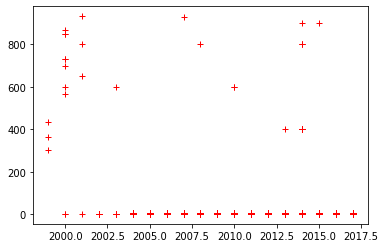

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Graph1=pd.read_csv('Modified1_data.csv')
plt.plot(Graph1.year,Graph1.Processor_speed,'r+')
plt.show()

In [ ]:
def ProcessorMapper(x):
    value = int(float(x[:-4]))
    if x[-3] == "G":
        value *= 1000
    return value

In [ ]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [ ]:
def cleanify(tag, func):
    clean_df = Intel_df[np.invert(Intel_df[tag].isnull())].copy()
    clean_df.reset_index()
    clean_df[tag] = clean_df[tag].apply(func)
    return clean_df
intel_processor_base_freq = cleanify("Processor_Base_Frequency", ProcessorMapper)

In [ ]:
def smoothify(tag, df, decreasing=False):
    val_till_now = 0
    if decreasing:
        val_till_now = df[tag].max()
    groups = df.groupby('Launch_Date')[tag].max().reset_index()
    for index, values in groups.iterrows():
        value = groups.loc[index,tag]
        if decreasing:
            if value < val_till_now:
                val_till_now = value
        else:
            if value > val_till_now:
                val_till_now = value
        groups.loc[index,tag] = val_till_now
    return groups
smooth_intel_processor_base_freq = smoothify("Processor_Base_Frequency", intel_processor_base_freq)

KeyError: ignored

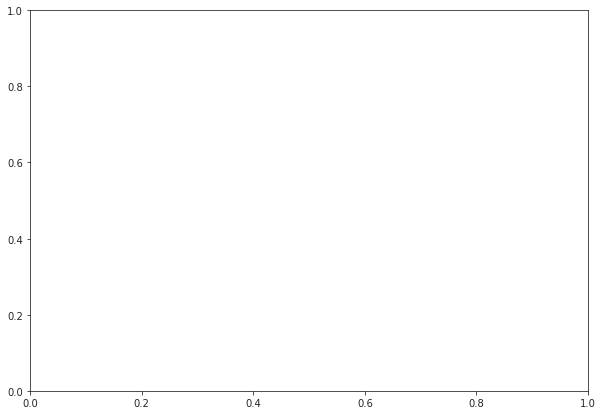

In [ ]:
def plot_graph(df, tag, title, y_multiples=250):
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.plot(
        pd.to_datetime(df["year"]),
        df[tag]
    )
    hfmt = mdates.DateFormatter("%Y")

    ax.xaxis.set_major_formatter(hfmt)
    ax.yaxis.set_label_text(title)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.format_xdata = hfmt

    ax.yaxis.set_major_locator(MultipleLocator(y_multiples))

    plt.show()
plot_graph(smooth_intel_processor_base_freq, "Processor_Base_Frequency", "Max Processor Frequency available (in MHz)")